<a href="https://colab.research.google.com/github/JoDeMiro/Micado-Research/blob/main/Stock_Exchange_Sesonal_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Exchange

A vizsgálat arról szól, hogy van egy idősorunk napi bontásban és arra vagyunk kíváncsiak, hogy az év egy adott napján véve, egy adott időpontig tartva, hogyan alakult volna a hozam, az adott időszakaszban.

In [1]:
!wget https://raw.githubusercontent.com/JoDeMiro/Data/main/Timeseries/Dax.csv

--2021-08-28 18:18:28--  https://raw.githubusercontent.com/JoDeMiro/Data/main/Timeseries/Dax.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281288 (275K) [text/plain]
Saving to: ‘Dax.csv.5’

Dax.csv.5           100%[===================>] 274.70K  --.-KB/s    in 0.006s  

2021-08-28 18:18:28 (45.3 MB/s) - ‘Dax.csv.5’ saved [281288/281288]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Dax.csv', parse_dates=['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2001-01-02,6431.14,6439.23,6289.82,6289.82,NaN
1,2001-01-03,6284.87,6467.82,6172.44,6434.96,NaN
2,2001-01-04,6443.87,6556.94,6356.92,6376.54,NaN
3,2001-01-05,6383.33,6485.34,6344.16,6382.31,NaN
4,2001-01-08,6368.83,6426.64,6337.95,6392.17,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5241 entries, 0 to 5240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5241 non-null   datetime64[ns]
 1   Open    5241 non-null   float64       
 2   High    5241 non-null   float64       
 3   Low     5241 non-null   float64       
 4   Close   5241 non-null   float64       
 5   Volume  4854 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 245.8 KB


In [6]:
type(df['Date'].values)

numpy.ndarray

In [7]:
df['Date'].values.dtype

dtype('<M8[ns]')

In [8]:
df['Date']  = pd.to_datetime(df['Date'],format='%Y%m%d')
df['year']  = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day']   = pd.DatetimeIndex(df['Date']).day

In [9]:
month_temp = df['month'].values

previous = -1
dom = 0
dm = []
for i in month_temp:
  dom = dom + 1
  if( previous != i ):
    previous = i
    dom = 1
  dm.append(dom)
df['dom'] = dm

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,dom
0,2001-01-02,6431.14,6439.23,6289.82,6289.82,NaN,2001,1,2,1
1,2001-01-03,6284.87,6467.82,6172.44,6434.96,NaN,2001,1,3,2
2,2001-01-04,6443.87,6556.94,6356.92,6376.54,NaN,2001,1,4,3
3,2001-01-05,6383.33,6485.34,6344.16,6382.31,NaN,2001,1,5,4
4,2001-01-08,6368.83,6426.64,6337.95,6392.17,NaN,2001,1,8,5


In [11]:
begin_month = 7
begin_day   = 1
duration = 30


In [12]:
df_filtered = df.copy()
# df_filtered['first'] = 0
# df_filtered.loc[df_filtered['month'] == begin_month, 'first'] = 1
df_filtered['first'] = df_filtered['month'].diff()

df_filtered['first'] = (df_filtered['first'] == 1) & (df_filtered['month'] == begin_month)


In [13]:
df_filtered.head()

,Date,Open,High,Low,Close,Volume,year,month,day,dom,first
0,2001-01-02,6431.14,6439.23,6289.82,6289.82,NaN,2001,1,2,1,False
1,2001-01-03,6284.87,6467.82,6172.44,6434.96,NaN,2001,1,3,2,False
2,2001-01-04,6443.87,6556.94,6356.92,6376.54,NaN,2001,1,4,3,False
3,2001-01-05,6383.33,6485.34,6344.16,6382.31,NaN,2001,1,5,4,False
4,2001-01-08,6368.83,6426.64,6337.95,6392.17,NaN,2001,1,8,5,False


In [14]:
df_filtered = df_filtered[df_filtered['month'] >= begin_month]
df_filtered = df_filtered[df_filtered['day'] >= begin_day]

In [15]:
df_filtered.head()

,Date,Open,High,Low,Close,Volume,year,month,day,dom,first
126,2001-07-02,6053.81,6131.97,6005.80,6109.50,NaN,2001,7,2,1,True
127,2001-07-03,6103.90,6108.07,6038.22,6056.84,NaN,2001,7,3,2,False
128,2001-07-04,6060.49,6080.70,5998.83,6015.72,NaN,2001,7,4,3,False
129,2001-07-05,5993.83,6040.97,5947.94,5999.19,NaN,2001,7,5,4,False
130,2001-07-06,5992.99,5992.99,5846.63,5862.10,NaN,2001,7,6,5,False


In [16]:
for i in range(duration):
  # csináljuk meg a nyitó/nyitó eléréseket százalékban
  df_filtered['op'+str(i)] = ( -1 * df_filtered['Open'].diff(-i) ) / df_filtered['Open'] * 100

In [17]:
df_filtered

,Date,Open,High,Low,Close,Volume,year,month,day,dom,first,op0,op1,op2,op3,op4,op5,op6,op7,op8,op9,op10,op11,op12,op13,op14,op15,op16,op17,op18,op19,op20,op21,op22,op23,op24,op25,op26,op27,op28,op29
126,2001-07-02,6053.81,6131.97,6005.80,6109.50,NaN,2001,7,2,1,True,-0.0,0.827413,0.110344,-0.990781,-1.004657,-3.169739,-3.043538,-4.196366,-3.953048,-2.717462,-2.087281,-3.426272,-3.561394,-5.390490,-3.857406,-4.999827,-4.510548,-6.290914,-7.587288,-6.153315,-5.030881,-4.151435,-3.206741,-3.438826,-4.565059,-5.278824,-5.062101,-5.040297,-7.569944,-8.767206
127,2001-07-03,6103.90,6108.07,6038.22,6056.84,NaN,2001,7,3,2,False,-0.0,-0.711185,-1.803273,-1.817035,-3.964351,-3.839185,-4.982552,-4.741231,-3.515785,-2.890775,-4.218778,-4.352791,-6.166877,-4.646374,-5.779420,-5.294156,-7.059913,-8.345648,-6.923442,-5.810220,-4.937990,-4.001049,-4.231229,-5.348220,-6.056128,-5.841184,-5.819558,-8.328446,-9.515883,-10.858631
128,2001-07-04,6060.49,6080.70,5998.83,6015.72,NaN,2001,7,4,3,False,-0.0,-1.099911,-1.113771,-3.276468,-3.150405,-4.301962,-4.058913,-2.824689,-2.195202,-3.532718,-3.667690,-5.494770,-3.963376,-5.104538,-4.615798,-6.394202,-7.689147,-6.256755,-5.135558,-4.257082,-3.313428,-3.545258,-4.670249,-5.383228,-5.166744,-5.144964,-7.671822,-8.867765,-10.220131,-9.813398
129,2001-07-05,5993.83,6040.97,5947.94,5999.19,NaN,2001,7,5,4,False,-0.0,-0.014014,-2.200763,-2.073299,-3.237663,-2.991910,-1.743960,-1.107472,-2.459863,-2.596337,-4.443736,-2.895311,-4.049164,-3.554989,-5.353172,-6.662518,-5.214195,-4.080529,-3.192283,-2.238135,-2.472543,-3.610046,-4.330954,-4.112062,-4.090039,-6.645000,-7.854243,-9.221650,-8.810393,-7.880938
130,2001-07-06,5992.99,5992.99,5846.63,5862.10,NaN,2001,7,6,5,False,-0.0,-2.187055,-2.059573,-3.224100,-2.978313,-1.730188,-1.093611,-2.446191,-2.582684,-4.430343,-2.881700,-4.035715,-3.541471,-5.339905,-6.649435,-5.200910,-4.067085,-3.178714,-2.224432,-2.458873,-3.596535,-4.317544,-4.098622,-4.076596,-6.631915,-7.841328,-9.208926,-8.797612,-7.868026,-8.987500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,2021-08-19,15737.18,15804.85,15621.98,15765.81,NaN,2021,8,19,14,False,-0.0,-0.015886,1.229826,1.021022,1.116274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5237,2021-08-20,15734.68,15808.04,15656.28,15808.04,NaN,2021,8,20,15,False,-0.0,1.245910,1.037072,1.132340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5238,2021-08-23,15930.72,15930.72,15799.59,15852.79,NaN,2021,8,23,16,False,-0.0,-0.206268,-0.112173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5239,2021-08-24,15897.86,15918.72,15856.05,15905.85,NaN,2021,8,24,17,False,-0.0,0.094289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# vágjuk le az utolsó n sort
df_filtered.drop(df_filtered.tail(duration).index, inplace = True)

In [19]:
df_filtered.tail()

,Date,Open,High,Low,Close,Volume,year,month,day,dom,first,op0,op1,op2,op3,op4,op5,op6,op7,op8,op9,op10,op11,op12,op13,op14,op15,op16,op17,op18,op19,op20,op21,op22,op23,op24,op25,op26,op27,op28,op29
5206,2021-07-08,15584.72,15591.65,15304.41,15420.64,NaN,2021,7,8,6,False,-0.0,-0.556892,0.581980,1.185713,0.952664,0.979421,0.629014,-1.056034,-2.244955,-2.212423,-0.330452,0.121722,0.012448,-0.300487,-0.294968,0.154639,-0.583777,0.301449,-0.301770,0.442292,0.686698,1.194311,1.211379,0.958760,1.330791,1.569165,2.331964,1.867085,1.844114,2.248934
5207,2021-07-09,15497.93,15687.93,15479.44,15687.93,NaN,2021,7,9,7,False,-0.0,1.145250,1.752363,1.518009,1.544916,1.192546,-0.501938,-1.697517,-1.664803,0.227708,0.682414,0.572528,0.257841,0.263390,0.715515,-0.027036,0.863148,0.256550,1.004779,1.250554,1.761009,1.778173,1.524139,1.898254,2.137963,2.905033,2.437551,2.414451,2.821538,1.543755
5208,2021-07-12,15675.42,15806.90,15631.84,15790.51,NaN,2021,7,12,8,False,-0.0,0.600239,0.368539,0.395141,0.046761,-1.628537,-2.810579,-2.778235,-0.907153,-0.457595,-0.566237,-0.877361,-0.871875,-0.424869,-1.159012,-0.278908,-0.878637,-0.138880,0.104112,0.608788,0.625757,0.374599,0.744478,0.981473,1.739858,1.277669,1.254831,1.657308,0.393993,0.378044
5209,2021-07-13,15769.51,15806.57,15747.57,15789.64,NaN,2021,7,13,9,False,-0.0,-0.230318,-0.203874,-0.550176,-2.215478,-3.390467,-3.358316,-1.498398,-1.051523,-1.159516,-1.468784,-1.463330,-1.018992,-1.748754,-0.873902,-1.470052,-0.734709,-0.493167,0.008497,0.025365,-0.224294,0.143378,0.378959,1.132819,0.673388,0.650686,1.050762,-0.205016,-0.220869,1.022289
5210,2021-07-14,15733.19,15810.68,15717.83,15788.98,NaN,2021,7,14,10,False,-0.0,0.026504,-0.320596,-1.989743,-3.167444,-3.135219,-1.271007,-0.823101,-0.931343,-1.241325,-1.235859,-0.790494,-1.521942,-0.645069,-1.242596,-0.505555,-0.263456,0.239367,0.256274,0.006038,0.374558,0.610684,1.366284,0.905792,0.883038,1.284037,0.025360,0.009470,1.255499,1.046641


In [20]:
# szűrjük le azokra az esetekre ami a vizsgált időszak első napja
df_filtered = df_filtered[df_filtered['first'] == True]

In [21]:
df_filtered.head()

,Date,Open,High,Low,Close,Volume,year,month,day,dom,first,op0,op1,op2,op3,op4,op5,op6,op7,op8,op9,op10,op11,op12,op13,op14,op15,op16,op17,op18,op19,op20,op21,op22,op23,op24,op25,op26,op27,op28,op29
126,2001-07-02,6053.81,6131.97,6005.80,6109.50,NaN,2001,7,2,1,True,-0.0,0.827413,0.110344,-0.990781,-1.004657,-3.169739,-3.043538,-4.196366,-3.953048,-2.717462,-2.087281,-3.426272,-3.561394,-5.390490,-3.857406,-4.999827,-4.510548,-6.290914,-7.587288,-6.153315,-5.030881,-4.151435,-3.206741,-3.438826,-4.565059,-5.278824,-5.062101,-5.040297,-7.569944,-8.767206
378,2002-07-01,4377.10,4443.69,4318.23,4366.81,167226432.0,2002,7,1,1,True,-0.0,-0.409632,-3.993740,-5.407005,-2.487263,2.256974,1.572502,-0.555847,-4.507779,-5.850449,-5.770259,-10.600169,-9.095748,-6.434854,-6.491513,-11.171552,-15.210984,-19.682667,-17.002125,-19.437756,-18.107651,-11.975280,-11.429942,-15.484910,-17.714697,-19.277604,-24.155948,-18.436636,-20.644262,-15.863471
631,2003-07-01,3217.21,3217.21,3119.35,3146.55,199149664.0,2003,7,1,1,True,-0.0,-2.148135,0.616683,0.639996,0.861927,3.661247,3.913950,3.258413,1.472394,3.664977,5.427995,5.220983,5.211037,3.471952,4.751322,2.428502,3.310011,2.753939,4.677966,4.459143,6.225891,6.256353,6.699594,8.224518,6.729744,6.119899,6.536098,4.764687,3.812620,3.601257
886,2004-07-01,4078.36,4101.52,4026.56,4035.02,194615296.0,2004,7,1,1,True,-0.0,-1.174492,-1.965741,-1.883600,-3.285634,-3.848115,-3.582322,-4.090370,-4.439284,-4.506468,-4.417462,-5.644916,-5.721172,-6.595789,-5.608137,-5.177326,-6.695338,-6.931708,-7.918134,-6.113242,-6.448671,-4.351504,-4.589590,-5.130003,-5.170951,-5.985004,-6.364813,-8.627242,-9.482978,-8.722869
1143,2005-07-01,4584.44,4623.80,4579.51,4617.07,209178240.0,2005,7,1,1,True,-0.0,0.794426,0.806642,0.504533,0.235361,-0.523728,0.696268,1.686793,1.580782,2.232770,2.564326,2.904390,3.081729,3.818787,4.784227,5.272400,5.654998,5.482676,5.663069,6.230423,6.806066,6.499158,6.762440,7.546614,7.376037,5.937257,5.510160,5.483549,7.336338,8.336896


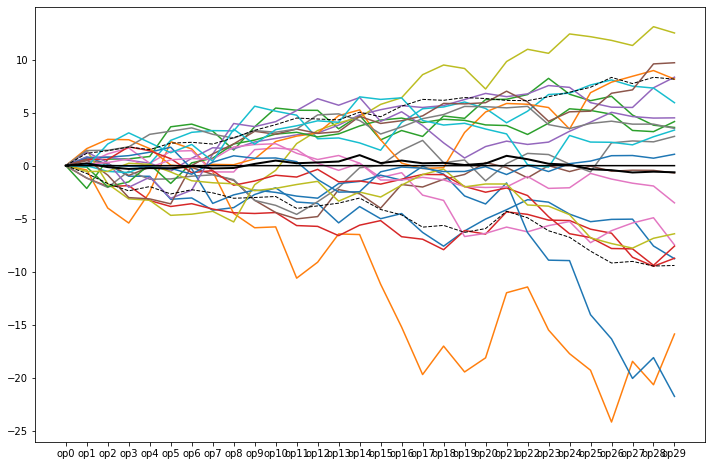

In [22]:
names = []
for i in range(duration):
  names.append('op' + str(i))

t = df_filtered[names]

rows    = t.shape[0]
columns = t.shape[1]

# print('columns = ', columns)
# print('rows    = ', rows)

plt.figure(figsize=(12, 8))
for i in range(rows):
  plt.plot(t.iloc[i])
mean = t.mean(axis=0)
std  = t.std(axis=0)
zero = mean/10000
plt.plot(mean, c='black', lw=2)
plt.plot(mean - std, c='black', lw=1, linestyle='dashed')
plt.plot(mean + std, c='black', lw=1, linestyle='dashed')
plt.plot(zero, c='black')
plt.show()

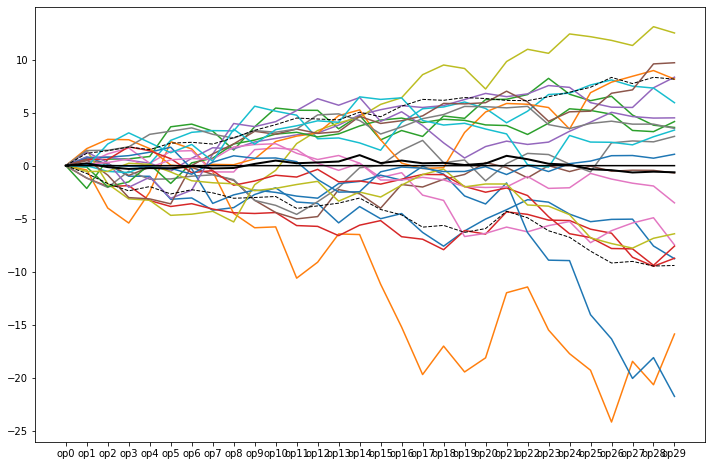

In [23]:
begin_month = 7
begin_day   = 1
duration    = 30

df_filtered = df.copy()
df_filtered['first'] = df_filtered['month'].diff()
df_filtered['first'] = (df_filtered['first'] == 1) & (df_filtered['month'] == begin_month)

df_filtered = df_filtered[df_filtered['month'] >= begin_month]
df_filtered = df_filtered[df_filtered['day'] >= begin_day]

for i in range(duration):
  # csináljuk meg a nyitó/nyitó eléréseket százalékban
  df_filtered['op'+str(i)] = ( -1 * df_filtered['Open'].diff(-i) ) / df_filtered['Open'] * 100

# vágjuk le az utolsó n sort
df_filtered.drop(df_filtered.tail(duration).index, inplace = True)

# szűrjük le azokra az esetekre ami a vizsgált időszak első napja
df_filtered = df_filtered[df_filtered['first'] == True]

names = []
for i in range(duration):
  names.append('op' + str(i))

t = df_filtered[names]

rows    = t.shape[0]
columns = t.shape[1]

plt.figure(figsize=(12, 8))
for i in range(rows):
  plt.plot(t.iloc[i])
mean = t.mean(axis=0)
std  = t.std(axis=0)
zero = mean/10000
plt.plot(mean, c='black', lw=2)
plt.plot(mean - std, c='black', lw=1, linestyle='dashed')
plt.plot(mean + std, c='black', lw=1, linestyle='dashed')
plt.plot(zero, c='black')
plt.show()


In [24]:
def f(month, day, dur):

  begin_month = month
  begin_day   = day
  duration = dur

  df_filtered = df.copy()
  df_filtered['first'] = df_filtered['month'].diff()
  df_filtered['first'] = (df_filtered['first'] == 1) & (df_filtered['month'] == begin_month)

  df_filtered = df_filtered[df_filtered['month'] >= begin_month]
  df_filtered = df_filtered[df_filtered['day'] >= begin_day]

  for i in range(duration):
    # csináljuk meg a nyitó/nyitó eléréseket százalékban
    df_filtered['op'+str(i)] = ( -1 * df_filtered['Open'].diff(-i) ) / df_filtered['Open'] * 100

  # vágjuk le az utolsó n sort
  df_filtered.drop(df_filtered.tail(duration).index, inplace = True)

  # szűrjük le azokra az esetekre ami a vizsgált időszak első napja
  df_filtered = df_filtered[df_filtered['first'] == True]

  names = []
  for i in range(duration):
    names.append('op' + str(i))

  t = df_filtered[names]

  rows    = t.shape[0]
  columns = t.shape[1]

  plt.figure(figsize=(12, 8))
  for i in range(rows):
    plt.plot(t.iloc[i])
  mean = t.mean(axis=0)
  std  = t.std(axis=0)
  zero = mean/10000
  plt.plot(mean, c='black', lw=2)
  plt.plot(mean - std, c='black', lw=1, linestyle='dashed')
  plt.plot(mean + std, c='black', lw=1, linestyle='dashed')
  plt.plot(zero, c='black')
  plt.show()


In [25]:
output = interact(f, month=widgets.IntSlider(min=1, max=12, step=1, value=7),
                  day=widgets.IntSlider(min=1, max=30, step=1, value=1),
                  dur=widgets.IntSlider(min=1, max=60, step=1, value=30))

interactive(children=(IntSlider(value=7, description='month', max=12, min=1), IntSlider(value=1, description='…

In [57]:
def f(month, day, dur):

  begin_month = month
  begin_day   = day
  duration = dur

  df_filtered = df.copy()
  df_filtered['first'] = df_filtered['month'].diff()
  df_filtered['first'] = (df_filtered['first'] == 1) & (df_filtered['month'] == begin_month)

  df_filtered = df_filtered[df_filtered['month'] >= begin_month]
  df_filtered = df_filtered[df_filtered['day'] >= begin_day]

  for i in range(duration):
    # csináljuk meg a nyitó/nyitó eléréseket százalékban
    df_filtered['op'+str(i)] = ( -1 * df_filtered['Open'].diff(-i) ) / df_filtered['Open'] * 100

  # vágjuk le az utolsó n sort
  df_filtered.drop(df_filtered.tail(duration).index, inplace = True)

  # szűrjük le azokra az esetekre ami a vizsgált időszak első napja
  df_filtered = df_filtered[df_filtered['first'] == True]

  names = []
  for i in range(duration):
    names.append('op' + str(i))

  t = df_filtered[names]

  rows    = t.shape[0]
  columns = t.shape[1]

  plt.figure(figsize=(12, 8))
  for i in range(rows):
    b = 1/rows*i
    plt.plot(t.iloc[i], c = (0.1, 1-b, b))
  mean = t.mean(axis=0)
  std  = t.std(axis=0)
  zero = mean/10000
  plt.plot(mean, c='black', lw=2)
  plt.plot(mean - std, c='black', lw=1, linestyle='dashed')
  plt.plot(mean + std, c='black', lw=1, linestyle='dashed')
  plt.plot(zero, c='black')
  plt.ylim((-30, 30))
  plt.show()


In [58]:
output = interact(f, month=widgets.IntSlider(min=1, max=12, step=1, value=7),
                  day=widgets.IntSlider(min=1, max=30, step=1, value=1),
                  dur=widgets.IntSlider(min=1, max=60, step=1, value=30))

interactive(children=(IntSlider(value=7, description='month', max=12, min=1), IntSlider(value=1, description='…

In [28]:
# ott áltam meg, hogy nem lehet jól kiválasztani a napot

In [59]:
#@title
def f(month, day, dur):

  begin_month = month
  begin_day   = day
  duration = dur

  df_filtered = df.copy()
  # df_filtered['first'] = df_filtered['month'].diff()
  # df_filtered['first'] = (df_filtered['first'] == 1) & (df_filtered['month'] == begin_month)
  df_filtered['first'] = (df_filtered['month'] == begin_month) & (df_filtered['dom'] == begin_day)

  for i in range(duration):
    # csináljuk meg a nyitó/nyitó eléréseket százalékban
    df_filtered['op'+str(i)] = ( -1 * df_filtered['Open'].diff(-i) ) / df_filtered['Open'] * 100

  # vágjuk le az utolsó n sort
  df_filtered.drop(df_filtered.tail(duration).index, inplace = True)

  # szűrjük le azokra az esetekre ami a vizsgált időszak első napja
  df_filtered = df_filtered[df_filtered['first'] == True]

  names = []
  for i in range(duration):
    names.append('op' + str(i))

  t = df_filtered[names]

  rows    = t.shape[0]
  columns = t.shape[1]

  plt.figure(figsize=(12, 8))
  for i in range(rows):
    b = 1/rows*i
    plt.plot(t.iloc[i], c = (0.1, 1-b, b))
  mean = t.mean(axis=0)
  std  = t.std(axis=0)
  zero = mean/10000
  plt.plot(mean, c='black', lw=2)
  plt.plot(mean - std, c='black', lw=1, linestyle='dashed')
  plt.plot(mean + std, c='black', lw=1, linestyle='dashed')
  plt.plot(zero, c='black')
  plt.ylim((-30, 30))
  plt.xticks(rotation='vertical')
  plt.show()


In [62]:
#@title
output = interact(f, month=widgets.IntSlider(min=1, max=12, step=1, value=7),
                  day=widgets.IntSlider(min=1, max=30, step=1, value=1),
                  dur=widgets.IntSlider(min=1, max=60, step=1, value=30))

interactive(children=(IntSlider(value=7, description='month', max=12, min=1), IntSlider(value=1, description='…

In [63]:
#@title
output = interact(f, month=widgets.IntSlider(min=1, max=12, step=1, value=3),
                  day=widgets.IntSlider(min=1, max=30, step=1, value=10),
                  dur=widgets.IntSlider(min=1, max=120, step=1, value=30))

interactive(children=(IntSlider(value=3, description='month', max=12, min=1), IntSlider(value=10, description=…

In [65]:
#@title
def f(month, day, dur):

  begin_month = month
  begin_day   = day
  duration = dur

  df_filtered = df.copy()
  # df_filtered['first'] = df_filtered['month'].diff()
  # df_filtered['first'] = (df_filtered['first'] == 1) & (df_filtered['month'] == begin_month)
  df_filtered['first'] = (df_filtered['month'] == begin_month) & (df_filtered['dom'] == begin_day)

  for i in range(duration):
    # csináljuk meg a nyitó/nyitó eléréseket százalékban
    df_filtered['op'+str(i)] = ( -1 * df_filtered['Open'].diff(-i) ) / df_filtered['Open'] * 100

  # vágjuk le az utolsó n sort
  df_filtered.drop(df_filtered.tail(duration).index, inplace = True)

  # szűrjük le azokra az esetekre ami a vizsgált időszak első napja
  df_filtered = df_filtered[df_filtered['first'] == True]

  names = []
  for i in range(duration):
    names.append('op' + str(i))

  t = df_filtered[names]

  rows    = t.shape[0]
  columns = t.shape[1]

  plt.figure(figsize=(25, 8))
  for i in range(rows):
    b = 1/rows*i
    plt.plot(t.iloc[i], c = (0.1, 1-b, b))
  mean = t.mean(axis=0)
  std  = t.std(axis=0)
  zero = mean/10000
  plt.plot(mean, c='black', lw=2)
  plt.plot(mean - std, c='black', lw=1, linestyle='dashed')
  plt.plot(mean + std, c='black', lw=1, linestyle='dashed')
  plt.plot(zero, c='black')
  plt.ylim((-30, 30))
  plt.xticks(rotation='vertical')
  plt.show()


In [66]:
#@title
output = interact(f, month=widgets.IntSlider(min=1, max=12, step=1, value=1),
                  day=widgets.IntSlider(min=1, max=30, step=1, value=10),
                  dur=widgets.IntSlider(min=1, max=270, step=1, value=256))

interactive(children=(IntSlider(value=1, description='month', max=12, min=1), IntSlider(value=10, description=…